# Odev1 – Genetik Algoritma ile Web Sunucusu Ayarları Optimizasyonu  
## Senaryo 8

**Adınız:** Ahmet Sudeys  
**Soyadınız:** Soylu  
**Okul Numaranız:** 2312721068  

**GitHub Repo Bağlantısı:**  
https://github.com/AhmetSudeys/yapay-zeka-proje-1


Gen   0 | En iyi: [12, 22] | Fitness: 102.80
Gen  10 | En iyi: [12, 18] | Fitness: 106.80
Gen  20 | En iyi: [12, 18] | Fitness: 106.80
Gen  30 | En iyi: [12, 18] | Fitness: 106.80
Gen  40 | En iyi: [12, 18] | Fitness: 106.80
Gen  50 | En iyi: [12, 18] | Fitness: 106.80
Gen  60 | En iyi: [12, 18] | Fitness: 106.80
Gen  70 | En iyi: [12, 18] | Fitness: 106.80
Gen  79 | En iyi: [12, 18] | Fitness: 106.80

=== SONUC ===
En iyi birey: [12, 18]
Kisit sagliyor mu?: True
Amac fonksiyonu skoru: 106.8
Carpim (cpu*ram): 216


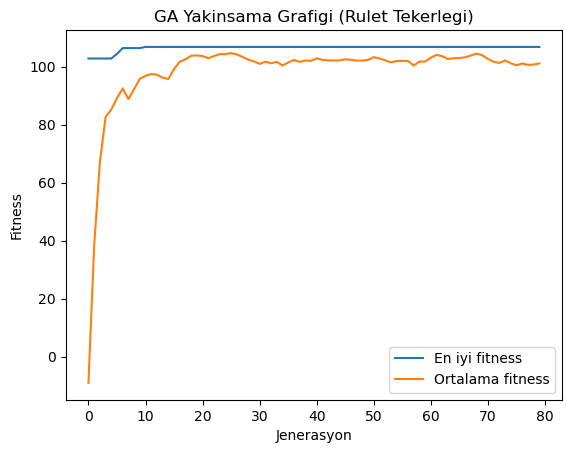

In [1]:
# Gerekli kütüphaneleri içe aktarıyorum; rastgelelik, sayısal işlemler ve grafik çizimi için.
import random
import numpy as np
import matplotlib.pyplot as plt

# Aynı sonuçları tekrar elde edebilmek için sabit seed değerleri belirliyorum.
random.seed(42)
np.random.seed(42)


# Verilen CPU ve RAM değerlerine göre performans skorunu hesaplayan amaç fonksiyonu.
def amac_fonksiyonu(cpu_cekirdek, ram_gb):
    return 5*cpu_cekirdek + 7*ram_gb - 0.1*(cpu_cekirdek**2) - 0.2*(ram_gb**2)


# Bir çözümün tüm problem kısıtlarını sağlayıp sağlamadığını kontrol ediyorum.
def kisit_saglanir_mi(cpu_cekirdek, ram_gb):
    if cpu_cekirdek < 4:
        return False
    if not (2 <= cpu_cekirdek <= 12):
        return False
    if not (4 <= ram_gb <= 64):
        return False
    if cpu_cekirdek * ram_gb > 512:
        return False
    return True


# Kısıtları dikkate alarak rastgele bir başlangıç bireyi oluşturuyorum.
def rastgele_birey_uret():
    cpu = random.randint(4, 12)
    ram_ust = min(64, 512 // cpu)
    ram = random.randint(4, ram_ust)
    return [cpu, ram]


# Belirlenen popülasyon boyutuna göre başlangıç popülasyonunu üretiyorum.
def populasyon_uret(pop_boyutu):
    return [rastgele_birey_uret() for _ in range(pop_boyutu)]


# Amaç fonksiyonuna ek olarak kısıt ihlallerini cezalandıran fitness fonksiyonunu tanımlıyorum.
def fitness(birey):
    cpu, ram = birey
    skor = amac_fonksiyonu(cpu, ram)
    ceza = 0

    if cpu < 4:
        ceza += (4 - cpu) * 1000
    if cpu * ram > 512:
        ceza += (cpu * ram - 512) * 50
    if cpu < 2 or cpu > 12:
        ceza += 5000
    if ram < 4 or ram > 64:
        ceza += 5000

    return skor - ceza


# Fitness değerlerine orantılı olasılıklarla birey seçmek için rulet tekerleği seçimi uyguluyorum.
def rulet_tekerlegi_secimi(populasyon):
    fitness_degerleri = np.array([fitness(b) for b in populasyon])

    # Negatif fitness ihtimaline karşı olasılık hesabı öncesi kaydırma yapıyorum.
    min_fitness = fitness_degerleri.min()
    if min_fitness < 0:
        fitness_degerleri = fitness_degerleri - min_fitness + 1

    olasiliklar = fitness_degerleri / fitness_degerleri.sum()
    secilen_index = np.random.choice(len(populasyon), p=olasiliklar)
    return populasyon[secilen_index]


# Her gen için rastgele ebeveyn seçerek uniform çaprazlama işlemi gerçekleştiriyorum.
def caprazlama(ebeveyn1, ebeveyn2, caprazlama_orani=0.9):
    if random.random() > caprazlama_orani:
        return ebeveyn1[:], ebeveyn2[:]

    cocuk1 = [
        ebeveyn1[0] if random.random() < 0.5 else ebeveyn2[0],
        ebeveyn1[1] if random.random() < 0.5 else ebeveyn2[1]
    ]
    cocuk2 = [
        ebeveyn2[0] if random.random() < 0.5 else ebeveyn1[0],
        ebeveyn2[1] if random.random() < 0.5 else ebeveyn1[1]
    ]

    return cocuk1, cocuk2


# Mutasyon veya çaprazlama sonrası bireyi tekrar geçerli sınırlar içine çekiyorum.
def birey_onar(birey):
    cpu, ram = birey

    cpu = int(round(cpu))
    ram = int(round(ram))

    cpu = max(4, min(12, cpu))
    ram = max(4, min(64, ram))

    if cpu * ram > 512:
        ram = min(ram, 512 // cpu)
        ram = max(4, ram)

    return [cpu, ram]


# Küçük rastgele değişimler yaparak popülasyonun çeşitliliğini artırıyorum.
def mutasyon(birey, mutasyon_orani=0.2):
    cpu, ram = birey

    if random.random() < mutasyon_orani:
        cpu += random.choice([-1, 1])

    if random.random() < mutasyon_orani:
        ram += random.choice([-2, -1, 1, 2])

    return birey_onar([cpu, ram])


# Genetik algoritmanın tüm adımlarını bir araya getiren ana döngüyü çalıştırıyorum.
def genetik_algoritma(pop_boyutu=40,
                      jenerasyon_sayisi=80,
                      caprazlama_orani=0.9,
                      mutasyon_orani=0.2,
                      elitizm=True,
                      rapor_adim=10):

    populasyon = populasyon_uret(pop_boyutu)

    en_iyi_fitnessler = []
    ortalama_fitnessler = []

    for gen in range(jenerasyon_sayisi):
        populasyon.sort(key=fitness, reverse=True)

        en_iyi = populasyon[0]
        en_iyi_fit = fitness(en_iyi)
        ort_fit = np.mean([fitness(b) for b in populasyon])

        en_iyi_fitnessler.append(en_iyi_fit)
        ortalama_fitnessler.append(ort_fit)

        if gen % rapor_adim == 0 or gen == jenerasyon_sayisi - 1:
            print(f"Gen {gen:3d} | En iyi: {en_iyi} | Fitness: {en_iyi_fit:.2f}")

        yeni_pop = []

        if elitizm:
            yeni_pop.append(en_iyi[:])

        while len(yeni_pop) < pop_boyutu:
            p1 = rulet_tekerlegi_secimi(populasyon)
            p2 = rulet_tekerlegi_secimi(populasyon)

            c1, c2 = caprazlama(p1, p2, caprazlama_orani)
            c1 = mutasyon(c1, mutasyon_orani)
            c2 = mutasyon(c2, mutasyon_orani)

            yeni_pop.append(c1)
            if len(yeni_pop) < pop_boyutu:
                yeni_pop.append(c2)

        populasyon = yeni_pop

    populasyon.sort(key=fitness, reverse=True)
    return populasyon[0], en_iyi_fitnessler, ortalama_fitnessler


# Program doğrudan çalıştırıldığında genetik algoritmayı başlatıyorum.
if __name__ == "__main__":

    en_iyi_birey, en_iyiler, ortalamalar = genetik_algoritma()

    cpu, ram = en_iyi_birey

    print("\n=== SONUC ===")
    print("En iyi birey:", en_iyi_birey)
    print("Kisit sagliyor mu?:", kisit_saglanir_mi(cpu, ram))
    print("Amac fonksiyonu skoru:", amac_fonksiyonu(cpu, ram))
    print("Carpim (cpu*ram):", cpu * ram)

    plt.figure()
    plt.plot(en_iyiler, label="En iyi fitness")
    plt.plot(ortalamalar, label="Ortalama fitness")
    plt.xlabel("Jenerasyon")
    plt.ylabel("Fitness")
    plt.title("GA Yakinsama Grafigi (Rulet Tekerlegi)")
    plt.legend()
    plt.show()